# Project 1

In [1]:
#import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import timeit

In [2]:
# Linear regression using gradient descent
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def least_squares_GD(y, tx, initial_w,max_iters, gamma):
    N, D = tx.shape
    
    # Iterations of gradient descent
    w = initial_w
    for _ in range(max_iters):
        grad = -np.dot(tx.T, (y - np.dot(tx,w))) / N
        w = w - gamma * grad
        
    # Calculating the loss
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)
    
    return w, loss

In [3]:
#Linear regression using stochastic gradient descent
def least_squares_SGD(y, tx, initial_w,max_iters, gamma, frequency=0):
    N, D = tx.shape
    
    loss = []
    
    
    # Iterations of stochastic gradient descent
    w = initial_w
    for i in range(max_iters):
        k = random.randint(0,N-1)
        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]
        w = w - gamma * grad
        # Calculating the loss
        if frequency != 0 and i % frequency == 0:
            r = y - np.dot(tx,w)
            loss.append(np.dot(r,r) / (2*N))
            
    r = y - np.dot(tx,w)
    loss.append(np.dot(r,r) / (2*N))        
    
    return w, loss


In [4]:
#Least squares regression using normal equations
def least_squares(y, tx):
    N, _ = tx
    
    # Calculating w
    w = (np.linalg.inv((tx.T).dot(tx)).dot(tx.T)).dot(y)
    
    #Calculating loss
    r = y - tx.dot(w_opt)
    loss = np.dot(r,r)/(2*N)
    return w_opt, loss

In [5]:
#Ridge regression using normal equations
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
#lambda_:     regularization parameter

def ridge_regression(y, tx, lambda_):
    N,D = tx.shape
    
    A = np.dot(tx.T, tx) + lambda_ * np.ones(D)
    B = np.linalg.inv(A)
    w = np.dot(np.dot(B,tx.T), y)
    
    # Calculating loss
    r = y - np.dot(tx,w)
    loss = (np.dot(r,r)+ lambda_ * np.dot(w,w)) / (2*N)
    
    return w, loss
    
    

In [6]:
# Returns exp(x)/(1+exp(x))
# x is scalar or numpy array
def sigmoid(x):
    tmp = np.exp(-x)
    return 1/(1+tmp)



#Logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss
def logistic_regression(y, tx, initial_w,max_iters, gamma):
    N, _ = tx.shape
    w = initial_w
    
    for _ in range(max_iter):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)


def logistic_regression_GD(y, tx, initial_w,max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx)
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)

In [7]:
#Regularized logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# lambda:     scalar representing regularization parameter
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def reg_logistic_regression(y, tx, lambda_ ,initial_w, max_iters, gamma, frequency=0, x_test=None, y_test=None, log=None):
    N, _ = tx.shape
    w = initial_w
    
    losses = []
    
    info = pd.DataFrame()
    
    for i in range(max_iters):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]+lambda_*w
        w = w - gamma*grad
        
        if frequency != 0 and i % frequency == 0:
            tmp = np.dot(tx,w)
            loss = (- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))/N
            if loss == float('inf') or loss == float('nan'):
                print("Overflow")
                return w, losses
            losses.append(loss)
            train_evaluation = evaluate_on_set(w,tx,y)
            print(f'iteration {i}: loss: {losses[-1]}, precision on train: {train_evaluation}')
            if x_test is not None and y_test is not None:
                test_evaluation = evaluate_on_set(w,x_test,y_test)
                print(f'precision on test: {test_evaluation}\n')
            if log != None:
                row = {'lambda':[lambda_], 'gamma': [gamma], 'iteration': [i], 'loss': [loss]}
                row.update({'acc_train': [train_evaluation['accuracy']], 'prec_train': [train_evaluation['precision']], 
                       'recall_train': [train_evaluation['recall']], 'f1_train': [train_evaluation['f1_score']] })
                
                row.update({'acc_test': [test_evaluation['accuracy']], 'prec_test': [test_evaluation['precision']], 
                       'recall_test': [test_evaluation['recall']], 'f1_test': [test_evaluation['f1_score']] })
                for j in range(len(w)):
                    row[f'w_{j}'] = [w[j]]      
                info = pd.concat([info, pd.DataFrame.from_dict(row)])
                    
    ### 
    tmp = np.dot(tx,w)
    losses.append(loss)
    
    if log != None:
        info.to_csv(log)
    
    return w, losses, info

def reg_logistic_regression_GD(y, tx, lambda_ ,initial_w, max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx) + lambda_*w
        w = w - gamma*grad
    
    ### 
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return w, loss

# Loading data

In [14]:
path_train = './data/train.csv.zip'
path_test = './data/test.csv.zip'

train_data = pd.read_csv(path_train, compression='zip')
test_data = pd.read_csv(path_test, compression='zip')



In [15]:
train_data.shape

(250000, 32)

# Transform categorical data

In [22]:
ccolumn = 'PRI_jet_num'

for i in range(4):
    train_data[ccolumn+str(i)] = (train_data[ccolumn] == i).apply(lambda x: int(x))
    


In [23]:
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,PRI_jet_num0,PRI_jet_num1,PRI_jet_num2,PRI_jet_num3
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,2.150,0.444,46.062,1.24,-2.475,113.497,0,0,1,0
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0,1,0,0
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0,1,0,0
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1,0,0,0
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1,0,0,0


# Cleaning data

In [229]:
for column in train_data.columns:
    indexes = train_data[train_data[column] == -999].index
    train_data.drop(indexes, inplace=True)
    
for column in train_data.columns:
    if train_data[column].min() == -999:
        print(column)
        
train_data.shape

(68114, 32)

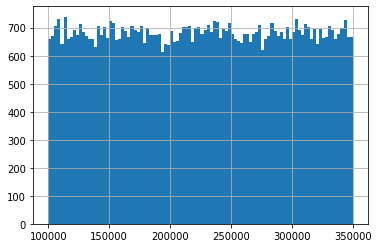

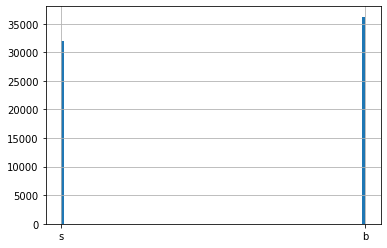

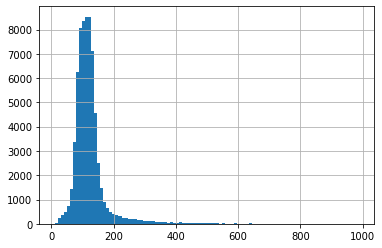

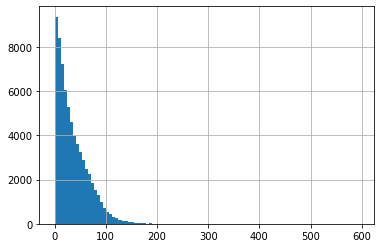

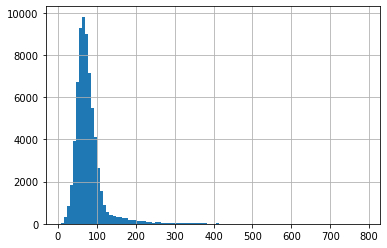

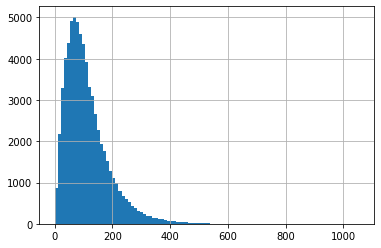

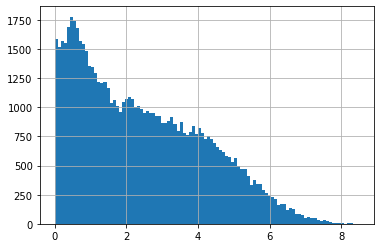

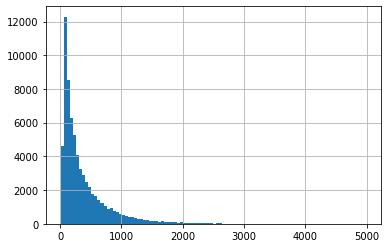

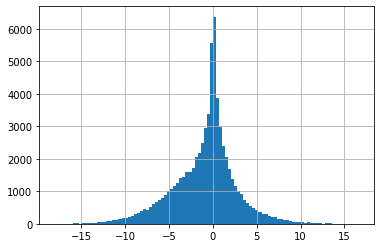

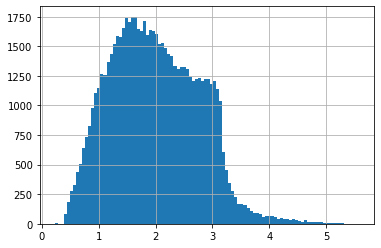

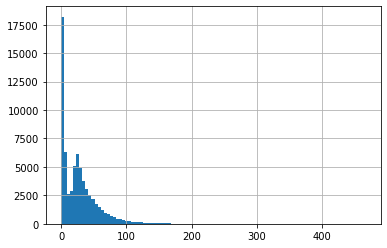

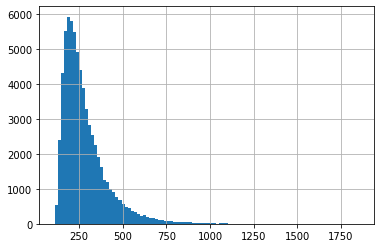

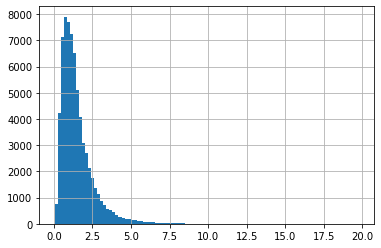

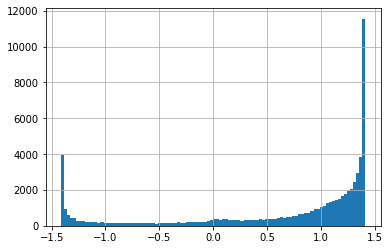

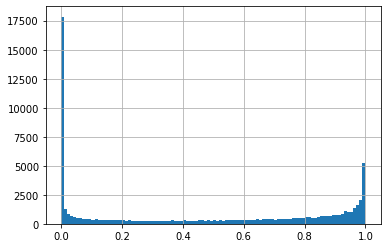

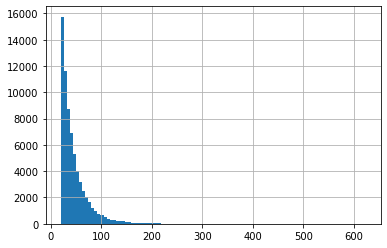

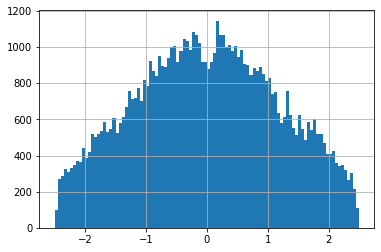

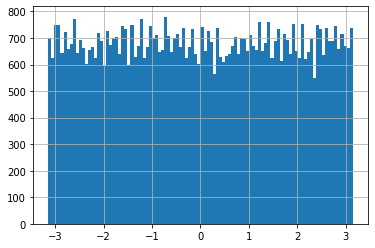

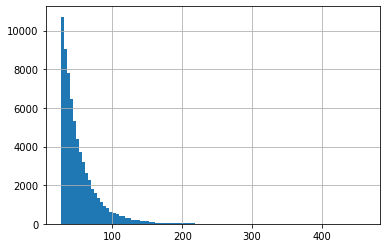

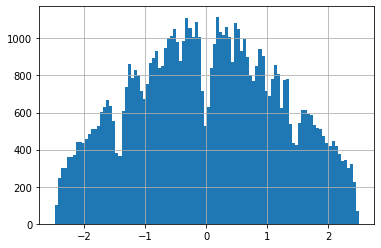

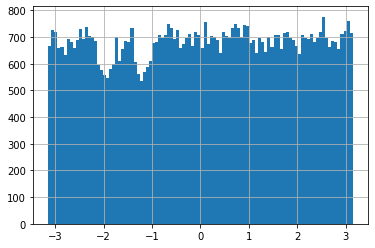

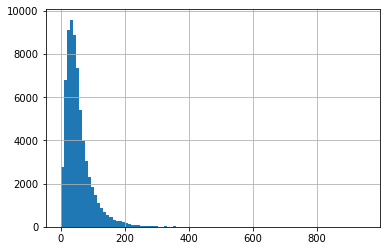

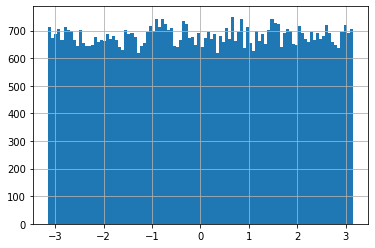

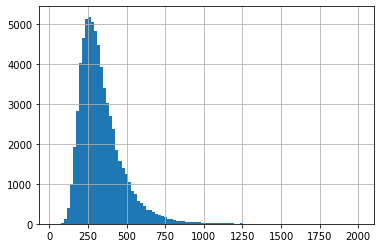

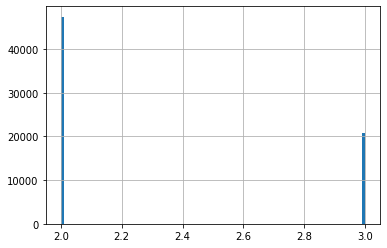

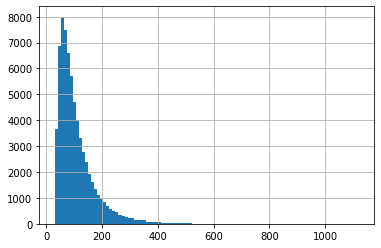

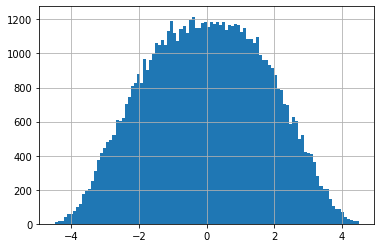

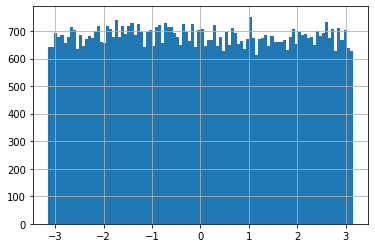

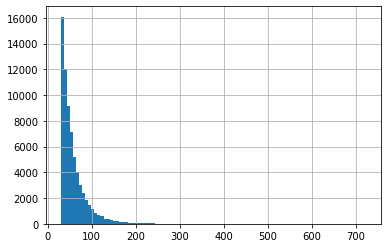

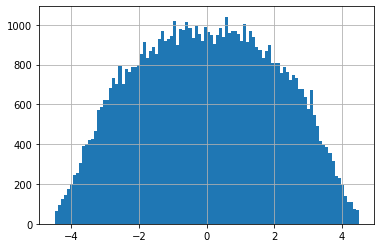

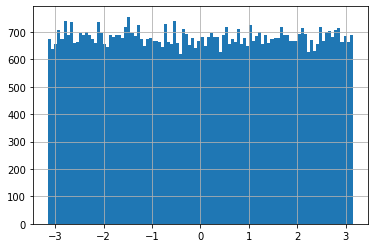

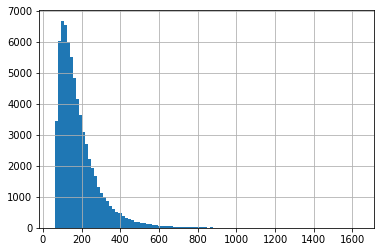

In [90]:
for column in train_data.columns:
    train_data[column].hist(bins=100)
    plt.show()

In [91]:
train_data.shape

(68114, 32)

In [92]:
train_data['Prediction'] = train_data['Prediction'].apply(lambda x: int(x=='b'))
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,1,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,0,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,1,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,0,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [93]:
print(train_data[train_data['Prediction']==1]['Id'].count())
print(train_data[train_data['Prediction']==0]['Id'].count())

36220
31894


# Standardizing data

In [94]:
def standardize(df):
    for column in df.columns:
        if column == 'Id':
            continue
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

In [95]:
train_data = standardize(train_data)
train_data.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,0.531756,0.115441,0.059349,0.090982,0.105639,0.286279,0.073483,0.495045,0.330504,...,0.501112,0.152491,0.303711,0.070328,0.499245,0.498239,0.040372,0.498563,0.499239,0.078280
std,72243.940540,0.498994,0.062098,0.051743,0.052069,0.072430,0.205892,0.080781,0.103492,0.144765,...,0.288653,0.071011,0.459863,0.062516,0.194135,0.287964,0.046604,0.227118,0.289186,0.068848
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162349.750000,0.000000,0.085291,0.019048,0.063850,0.054767,0.105492,0.020128,0.441810,0.218464,...,0.253342,0.104001,0.000000,0.028108,0.351045,0.249562,0.010691,0.319028,0.248727,0.031305
50%,225288.000000,1.000000,0.105642,0.045372,0.081308,0.089774,0.252440,0.044094,0.512243,0.319940,...,0.500796,0.137510,0.000000,0.052434,0.499889,0.494986,0.026185,0.498444,0.498727,0.059695
75%,287772.750000,1.000000,0.126316,0.087841,0.103607,0.138281,0.439962,0.095910,0.546955,0.438423,...,0.750318,0.183819,1.000000,0.092512,0.647732,0.748050,0.053433,0.678222,0.750318,0.103846
max,349994.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Augmentation functions

In [96]:
def feature_polynomial_expansion(x, columns, d):
    if d == 0:
        new_x = x.drop(columns, axis=1)
        return new_x
    
    new_x = x.copy()
    for column in columns:
        for i in range(2,d+1):
            new_x[f'{column}^{i}'] = x[column] ** i
            
    return new_x

In [97]:
def add_constant_attribute(x):
    N, _ = x.shape
    new_x = x.copy()
    new_x['Constant'] = 1
    return new_x

# Splitting function

In [98]:
def split (data, ycolumn, train_ratio=0.75, seed=42):
    np.random.seed(seed)
    
    # default extreme value for train_ratio
    if train_ratio > 0.90:
        train_ratio = 0.90
    train_size = round(train_ratio * len(data))
    
    boson = data[data[ycolumn]==1].to_numpy()
    spiner = data[data[ycolumn]==0].to_numpy()
    np.random.shuffle(boson)
    np.random.shuffle(spiner)
    train = np.concatenate((boson[:round(train_size/2)], spiner[:round(train_size/2)]))
    test = np.concatenate((boson[round(train_size/2):], spiner[round(train_size/2):]))
    
    columns = data.columns
    return pd.DataFrame(train, columns=columns), pd.DataFrame(test, columns=columns)

# Predicting functions

In [99]:
def predict(x, w):
    p = sigmoid(np.dot(x,w))
    return np.array([int(i>0.5) for i in p])

def get_accuracy(y,y_predict):
    return 1 - np.sum(abs(y-y_predict))/ len(y)     

def get_recall(y,y_predict):
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y)

def get_precision(y,y_predict):
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y_predict)

def evaluate_on_set(w, x, y):
    y_predict = predict(x, w)
    accuracy = get_accuracy(y,y_predict)
    recall = get_recall(y,y_predict)
    precision = get_precision(y,y_predict)
    f1_score = 2*recall*precision/(recall+precision)
    return {'accuracy' : accuracy, 'recall': recall, 'precision':precision, 'f1_score':f1_score}


In [100]:
y = np.array([0,1,23])
x = np.array([1,0,2])
r = np.logical_and(x, y)
np.count_nonzero(r)

1

# Transform data

In [101]:
def split_train_test(data):
    train_df, test_df = split(data, 'Prediction')
    x_train = train_df.drop(['Id', 'Prediction'], axis=1)
    y_train = train_df['Prediction']
    x_test = test_df.drop(['Id', 'Prediction'], axis=1)
    y_test = test_df['Prediction']
    return x_train.values, y_train.values, x_test.values, y_test.values

# Experiment 1

In [23]:
'''
columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 5)
curr_data = add_constant_attribute(curr_data)

x_train, y_train, x_test, y_test = split_train_test(curr_data)

lambda_ = 0.01
gamma = 0.001
max_iters = 100
initial_w = x_train.mean(axis=0)

w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, log=f'Test.csv')
plt.plot(loss)
plt.show()
    
print(f'lambda = {lambda_}; gamma = {gamma}')
print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

df.head()
'''

"\ncolumns = train_data.columns[2:]\ncurr_data = feature_polynomial_expansion(train_data, columns, 5)\ncurr_data = add_constant_attribute(curr_data)\n\nx_train, y_train, x_test, y_test = split_train_test(curr_data)\n\nlambda_ = 0.01\ngamma = 0.001\nmax_iters = 100\ninitial_w = x_train.mean(axis=0)\n\nw, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, log=f'Test.csv')\nplt.plot(loss)\nplt.show()\n    \nprint(f'lambda = {lambda_}; gamma = {gamma}')\nprint(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')\nprint(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')\n\ndf.head()\n"

# First bigger experiment

In [30]:
def_lambda_ = 0.01
def_gamma = 0.001
def_d = 3
max_iters = 10000000

lambda_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
gamma_range = [0.00001, 0.0005, 0.001, 0.005, 0.01]
d_range = [2,3,4,5]

for d in d_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = x_train.mean(axis=0)
    
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            def_gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={def_gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={def_gamma};lambda={def_lambda_}.png')
    plt.savefig(f'd={d};gamma={def_gamma};lambda={def_lambda_}.png')
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, def_d)
curr_data = add_constant_attribute(curr_data)
x_train, y_train, x_test, y_test = split_train_test(curr_data)
initial_w = x_train.mean(axis=0)

for lambda_ in lambda_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, 
                                            def_gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={def_gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.savefig(f'd={def_d};gamma={def_gamma};lambda={lambda_}.png')
    plt.title(f'd={def_d};gamma={def_gamma};lambda={lambda_}.png')
    plt.show()
    
    print(f'lambda = {lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

    
    
for gamma in gamma_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.title(f'd={def_d};gamma={gamma};lambda={def_lambda_}.png')
    plt.savefig(f'd={def_d};gamma={gamma};lambda={def_lambda_}.png')
    plt.ylim(0,1)
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

iteration 0: loss: 3.2291898950274556, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 100000: loss: 0.5928193139753032, precision on train: {'accuracy': 0.6796186822221353, 'recall': 0.6934189406099518, 'precision': 0.6747942700396221, 'f1_score': 0.6839798420575004}
precision on test: {'accuracy': 0.6747709654686399, 'recall': 0.6840872904373888, 'precision': 0.7713591720350618, 'f1_score': 0.7251067209371587}



KeyboardInterrupt: 

# Reading the results

In [129]:
from os import walk


In [130]:
mypath = './output/'
filenames = next(walk(mypath), (None, None, []))[2]

i = 0
frames = {}
d = {}
for file in filenames:
    if '.csv' in file:
        d[i] = int(file[2])
        frames[i] = pd.read_csv(mypath+file)
        frames[i]['d'] = d[i]
        frames[i]['Id'] = i
        i += 1
        
n = len(frames)

In [131]:
new_df = pd.DataFrame()
for i in range(n):
    new_df = pd.concat([new_df,frames[i]
                        [['Id','loss', 'gamma', 'lambda', 'acc_train', 'acc_test'
                          , 'iteration', 'd', ]].sort_values(['loss']).head(1)])
    
new_df

,Id,loss,gamma,lambda,acc_train,acc_test,iteration,d
5,0,0.618316,0.00100,0.1000,0.674471,0.668781,500000,3
99,1,0.589074,0.00001,0.0100,0.682986,0.675358,9900000,3
49,2,0.585554,0.01000,0.0100,0.686333,0.680879,4900000,3
84,3,0.538104,0.00100,0.0005,0.724054,0.720930,8400000,3
15,4,0.604871,0.00100,0.0500,0.675743,0.667136,1500000,3
40,5,0.585332,0.00500,0.0100,0.682300,0.676885,4000000,3
30,6,0.585780,0.00050,0.0100,0.684943,0.673538,3000000,3
30,7,0.582588,0.00100,0.0100,0.687409,0.675887,3000000,5
48,8,0.551948,0.00100,0.0010,0.712720,0.706307,4800000,3
53,9,0.577674,0.00100,0.0050,0.692029,0.683580,5300000,3


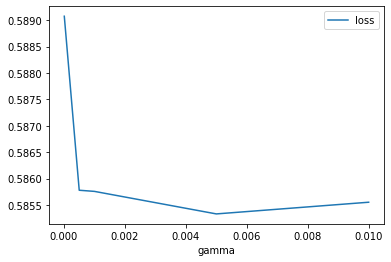

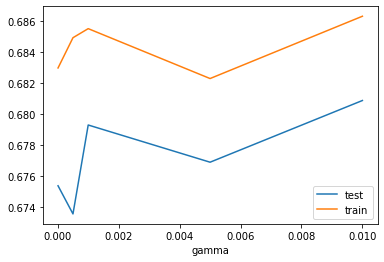

In [105]:
df_gamma = new_df[(new_df['lambda']==0.01) & (new_df['d']==3)].sort_values('gamma')
plt.plot(df_gamma['gamma'], df_gamma['loss'], label='loss')
plt.xlabel('gamma')
plt.legend()
plt.show()
plt.plot(df_gamma['gamma'], df_gamma['acc_test'], label='test')
plt.plot(df_gamma['gamma'], df_gamma['acc_train'], label='train')
plt.xlabel('gamma')
plt.legend()
plt.show()

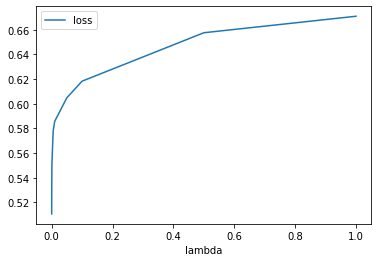

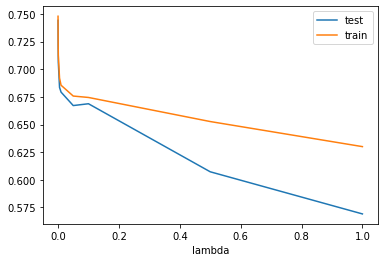

In [106]:
df_lambda = new_df[(new_df['gamma']==0.001) & (new_df['d']==3)].sort_values('lambda')
plt.plot(df_lambda['lambda'], df_lambda['loss'], label='loss')
plt.xlabel('lambda')
plt.legend()
plt.show()
plt.plot(df_lambda['lambda'], df_lambda['acc_test'], label='test')
plt.plot(df_lambda['lambda'], df_lambda['acc_train'], label='train')
plt.xlabel('lambda')
plt.legend()
plt.show()

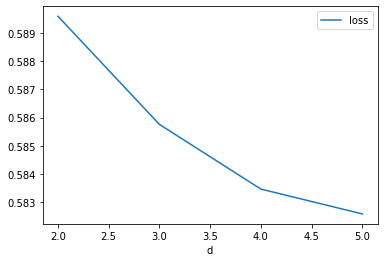

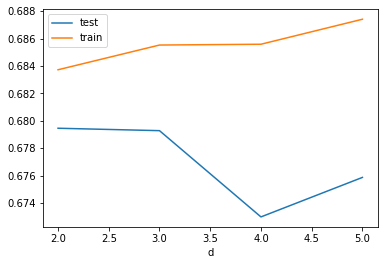

In [107]:
df_d = new_df[(new_df['gamma']==0.001) & (new_df['lambda']==0.01)].sort_values('d')
plt.plot(df_d['d'], df_d['loss'], label='loss')
plt.xlabel('d')
plt.legend()
plt.show()
plt.plot(df_d['d'], df_d['acc_test'], label='test')
plt.plot(df_d['d'], df_d['acc_train'], label='train')
plt.xlabel('d')
plt.legend()
plt.show()

Best $w$ obtained when $d = 3$, $\lambda=0.0001$ and $\gamma = 0.01$. We want to vary $\gamma$. Let us read $w$ first

In [108]:
best_id = 12 
best_frame = frames[best_id]
w_columns = list(filter(lambda x: 'w' in x, frames[best_id].columns)) 
best_w_df = best_frame[best_frame['iteration']==9800000][w_columns]
best_w = best_w_df.values

In [109]:
best_w_dft = best_w_df.transpose()
best_w_dft.columns
abs_best_df = abs(best_w_dft.iloc[:,0])
abs_best_df.sort_values(ascending=False).head(10)

w_7     6.850371
w_3     5.945146
w_1     5.637793
w_45    5.538263
w_13    4.488409
w_30    4.044629
w_10    3.760946
w_44    3.136837
w_38    2.658071
w_34    2.540483
Name: 98, dtype: float64

In [112]:
gamma = 0.00001
max_iter = 10000000
lambda_range = [0.0001, 0.00005, 0.00001, 0]
d = 3
best_w = best_w.flatten()

iteration 0: loss: 0.5106827572434715, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7630662020905923, 'precision': 0.7406520747834018, 'f1_score': 0.751692088162132}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7527395335768474, 'precision': 0.8240541371885574, 'f1_score': 0.7867841409691629}

iteration 10000: loss: 0.5106827914615046, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7633011001057041, 'precision': 0.7405423883318141, 'f1_score': 0.7517495324940718}
precision on test: {'accuracy': 0.7443035001174536, 'recall': 0.7531141706471856, 'precision': 0.8239573726816272, 'f1_score': 0.7869446075552946}

iteration 20000: loss: 0.5106816271401762, precision on train: {'accuracy': 0.7481110284618095, 'recall': 0.7607955212778452, 'precision': 0.7419724332786072, 'f1_score': 0.751266091931805}
precision on test: {'accuracy': 0.7430702372562838, 'recall': 0.7500234148168962, 'precision': 0.8243771875643401, 'f1_score': 0.78544455

iteration 250000: loss: 0.5106660263008531, precision on train: {'accuracy': 0.747699956935364, 'recall': 0.7636925967975571, 'precision': 0.7400227617602428, 'f1_score': 0.7516713870103847}
precision on test: {'accuracy': 0.7444796805261922, 'recall': 0.7533951484499392, 'precision': 0.8240114730587994, 'f1_score': 0.7871226576642694}

iteration 260000: loss: 0.5106671905192136, precision on train: {'accuracy': 0.7476020827624006, 'recall': 0.7645147398504483, 'precision': 0.7395008899155527, 'f1_score': 0.7517998075072185}
precision on test: {'accuracy': 0.7445971341320179, 'recall': 0.7541444225906153, 'precision': 0.8236497545008183, 'f1_score': 0.7873661565540507}

iteration 270000: loss: 0.5106623226274417, precision on train: {'accuracy': 0.7476608072661786, 'recall': 0.7632228007673335, 'precision': 0.7401852836206242, 'f1_score': 0.751527534164723}
precision on test: {'accuracy': 0.7444209537232793, 'recall': 0.7531141706471856, 'precision': 0.8241262683201804, 'f1_score': 0.7

iteration 500000: loss: 0.5106536187672737, precision on train: {'accuracy': 0.7474846337548448, 'recall': 0.7621657596993305, 'precision': 0.7404252082303274, 'f1_score': 0.7511382051084189}
precision on test: {'accuracy': 0.7440098661028893, 'recall': 0.7523648965065093, 'precision': 0.8240664751743948, 'f1_score': 0.7865850673194614}

iteration 510000: loss: 0.5106531981384722, precision on train: {'accuracy': 0.7474846337548448, 'recall': 0.7622440590377011, 'precision': 0.7403886374871659, 'f1_score': 0.7511574074074074}
precision on test: {'accuracy': 0.7440685929058022, 'recall': 0.7525522150416784, 'precision': 0.8240180494308276, 'f1_score': 0.7866653612688467}

iteration 520000: loss: 0.5106523353162393, precision on train: {'accuracy': 0.7474846337548448, 'recall': 0.761970011353404, 'precision': 0.7405166837879998, 'f1_score': 0.7510901863929301}
precision on test: {'accuracy': 0.7438924124970636, 'recall': 0.7520839187037557, 'precision': 0.8240968801313628, 'f1_score': 0.

iteration 750000: loss: 0.5106496036067306, precision on train: {'accuracy': 0.7478174059429198, 'recall': 0.759699330540657, 'precision': 0.7420650095602295, 'f1_score': 0.7507786354051805}
precision on test: {'accuracy': 0.7427178764388067, 'recall': 0.7488995036058818, 'precision': 0.8246699669966997, 'f1_score': 0.7849604869189615}

iteration 760000: loss: 0.5106562013494769, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.7581724934424304, 'precision': 0.7429316760655235, 'f1_score': 0.7504747142026739}
precision on test: {'accuracy': 0.7422480620155039, 'recall': 0.7474009553245293, 'precision': 0.825062034739454, 'f1_score': 0.784313725490196}

iteration 770000: loss: 0.5106572371875198, precision on train: {'accuracy': 0.7478957052812903, 'recall': 0.7579375954273186, 'precision': 0.7430150445194965, 'f1_score': 0.7504021395763484}
precision on test: {'accuracy': 0.7421306084096781, 'recall': 0.7472136367893603, 'precision': 0.8250258531540848, 'f1_score': 0.784

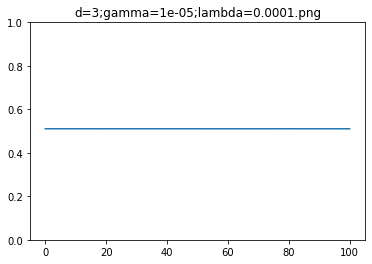

iteration 0: loss: 0.5106828345942667, precision on train: {'accuracy': 0.747974004619661, 'recall': 0.763144501428963, 'precision': 0.7406717835701802, 'f1_score': 0.7517402286882243}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7527395335768474, 'precision': 0.8240541371885574, 'f1_score': 0.7867841409691629}

iteration 10000: loss: 0.5106812432071649, precision on train: {'accuracy': 0.7480523039580316, 'recall': 0.7629096034138512, 'precision': 0.7408942285757737, 'f1_score': 0.7517407657440448}
precision on test: {'accuracy': 0.7440685929058022, 'recall': 0.7524585557740938, 'precision': 0.8240845214893835, 'f1_score': 0.7866444727308333}

iteration 20000: loss: 0.510679462576426, precision on train: {'accuracy': 0.7480131542888462, 'recall': 0.7618917120150335, 'precision': 0.7413149474325765, 'f1_score': 0.7514624963799595}
precision on test: {'accuracy': 0.7434225980737609, 'recall': 0.751240985295495, 'precision': 0.8240189028148757, 'f1_score': 0.7859487531

iteration 250000: loss: 0.5106611086667997, precision on train: {'accuracy': 0.7477586814391418, 'recall': 0.7618525623458482, 'precision': 0.740966378555382, 'f1_score': 0.7512643323167201}
precision on test: {'accuracy': 0.7438336856941508, 'recall': 0.7516156223658331, 'precision': 0.8243451463790447, 'f1_score': 0.7863021751910642}

iteration 260000: loss: 0.5106629773297461, precision on train: {'accuracy': 0.7478565556121051, 'recall': 0.7601299769016951, 'precision': 0.7419182269774551, 'f1_score': 0.7509136967493667}
precision on test: {'accuracy': 0.7429527836504581, 'recall': 0.749461459211389, 'precision': 0.8246084089035449, 'f1_score': 0.7852411559786076}

iteration 270000: loss: 0.5106607822066268, precision on train: {'accuracy': 0.7478761304466977, 'recall': 0.7611870179696981, 'precision': 0.7414483468710674, 'f1_score': 0.7511880384808562}
precision on test: {'accuracy': 0.7432464176650223, 'recall': 0.7503043926196498, 'precision': 0.8244314088710507, 'f1_score': 0.7

iteration 500000: loss: 0.5106459740669702, precision on train: {'accuracy': 0.747699956935364, 'recall': 0.7612261676388834, 'precision': 0.7411755736830068, 'f1_score': 0.7510670761148772}
precision on test: {'accuracy': 0.7437749588912379, 'recall': 0.7511473260279105, 'precision': 0.8245938720954143, 'f1_score': 0.786158898201245}

iteration 510000: loss: 0.5106459082666874, precision on train: {'accuracy': 0.7476608072661786, 'recall': 0.7606780722702893, 'precision': 0.7413766788766789, 'f1_score': 0.7509033641861993}
precision on test: {'accuracy': 0.7432464176650223, 'recall': 0.7502107333520652, 'precision': 0.8244981986618631, 'f1_score': 0.7856021969399765}

iteration 520000: loss: 0.5106443503549112, precision on train: {'accuracy': 0.7475629330932154, 'recall': 0.7616568139999217, 'precision': 0.7407759966492784, 'f1_score': 0.7510713044821063}
precision on test: {'accuracy': 0.7438336856941508, 'recall': 0.7515219630982486, 'precision': 0.8244117949244837, 'f1_score': 0.7

iteration 750000: loss: 0.5106332814675305, precision on train: {'accuracy': 0.7477391066045491, 'recall': 0.7609129702854011, 'precision': 0.7413793103448276, 'f1_score': 0.7510191464286404}
precision on test: {'accuracy': 0.7435987784824993, 'recall': 0.7506790296899878, 'precision': 0.8246733203004424, 'f1_score': 0.7859384192979015}

iteration 760000: loss: 0.5106361902733887, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.759581881533101, 'precision': 0.742262519606718, 'f1_score': 0.7508223365968809}
precision on test: {'accuracy': 0.7427178764388067, 'recall': 0.7485248665355437, 'precision': 0.8249380677126342, 'f1_score': 0.7848760127670021}

iteration 770000: loss: 0.5106359434595114, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.7595035821947305, 'precision': 0.7422995982399082, 'f1_score': 0.7508030496536244}
precision on test: {'accuracy': 0.7428353300446324, 'recall': 0.7486185258031283, 'precision': 0.8250412881915772, 'f1_score': 0.784

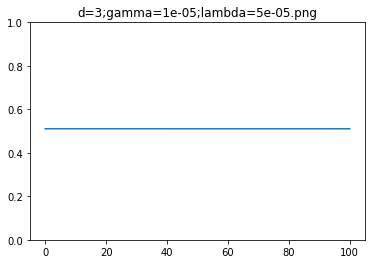

iteration 0: loss: 0.5106828105406261, precision on train: {'accuracy': 0.747974004619661, 'recall': 0.763144501428963, 'precision': 0.7406717835701802, 'f1_score': 0.7517402286882243}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7527395335768474, 'precision': 0.8240541371885574, 'f1_score': 0.7867841409691629}

iteration 10000: loss: 0.5106822530832419, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.763027052421407, 'precision': 0.740642219266578, 'f1_score': 0.7516680165066143}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7527395335768474, 'precision': 0.8240541371885574, 'f1_score': 0.7867841409691629}

iteration 20000: loss: 0.5106797235875505, precision on train: {'accuracy': 0.7481110284618095, 'recall': 0.7618525623458482, 'precision': 0.7414745665841113, 'f1_score': 0.7515254499111763}
precision on test: {'accuracy': 0.7434813248766737, 'recall': 0.7511473260279105, 'precision': 0.8241701777823451, 'f1_score': 0.78596628773

iteration 250000: loss: 0.5106586097657128, precision on train: {'accuracy': 0.7478957052812903, 'recall': 0.7611087186313276, 'precision': 0.7415134640323442, 'f1_score': 0.7511833233515581}
precision on test: {'accuracy': 0.7435400516795866, 'recall': 0.7507726889575723, 'precision': 0.8245217033532195, 'f1_score': 0.7859208784744349}

iteration 260000: loss: 0.5106580483683346, precision on train: {'accuracy': 0.7478565556121051, 'recall': 0.7605997729319187, 'precision': 0.7416965717339848, 'f1_score': 0.7510292440613101}
precision on test: {'accuracy': 0.7431289640591966, 'recall': 0.7499297555493116, 'precision': 0.8245288847698486, 'f1_score': 0.7854620364920541}

iteration 270000: loss: 0.510656416997253, precision on train: {'accuracy': 0.7478957052812903, 'recall': 0.7607955212778452, 'precision': 0.741660941912831, 'f1_score': 0.7511063870905401}
precision on test: {'accuracy': 0.7433051444679352, 'recall': 0.7502107333520652, 'precision': 0.8245830759728228, 'f1_score': 0.7

iteration 500000: loss: 0.5106363429676083, precision on train: {'accuracy': 0.7478174059429198, 'recall': 0.7609912696237717, 'precision': 0.7414555996338114, 'f1_score': 0.751096427674414}
precision on test: {'accuracy': 0.743363871270848, 'recall': 0.7503043926196498, 'precision': 0.824601132269686, 'f1_score': 0.7857002746174971}

iteration 510000: loss: 0.5106376621583802, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7604431742551775, 'precision': 0.7418837369184936, 'f1_score': 0.751048815853069}
precision on test: {'accuracy': 0.7433051444679352, 'recall': 0.749648777746558, 'precision': 0.8249845392702535, 'f1_score': 0.7855145002208156}

iteration 520000: loss: 0.5106376212273148, precision on train: {'accuracy': 0.7479544297850683, 'recall': 0.7604040245859922, 'precision': 0.74193055502502, 'f1_score': 0.7510537102200223}
precision on test: {'accuracy': 0.7433051444679352, 'recall': 0.749648777746558, 'precision': 0.8249845392702535, 'f1_score': 0.7855145

iteration 750000: loss: 0.5106202303500509, precision on train: {'accuracy': 0.7478369807775125, 'recall': 0.7615002153231806, 'precision': 0.7412446172020883, 'f1_score': 0.7512359029816159}
precision on test: {'accuracy': 0.7436575052854122, 'recall': 0.7511473260279105, 'precision': 0.8244243421052632, 'f1_score': 0.7860818426856162}

iteration 760000: loss: 0.5106198743748631, precision on train: {'accuracy': 0.7475042085894374, 'recall': 0.7624789570528129, 'precision': 0.7403071309107496, 'f1_score': 0.751229484484388}
precision on test: {'accuracy': 0.7438924124970636, 'recall': 0.7521775779713402, 'precision': 0.8240303714344347, 'f1_score': 0.7864662390442149}

iteration 770000: loss: 0.5106190327946503, precision on train: {'accuracy': 0.7477391066045491, 'recall': 0.7611087186313276, 'precision': 0.7412872721726531, 'f1_score': 0.7510672410129614}
precision on test: {'accuracy': 0.743363871270848, 'recall': 0.7505853704224033, 'precision': 0.8244007818125707, 'f1_score': 0.7

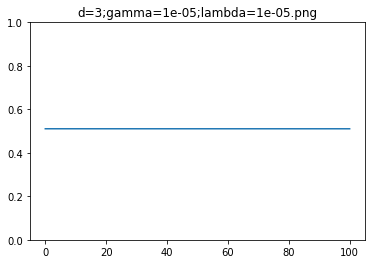

iteration 0: loss: 0.5106827684997054, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7630662020905923, 'precision': 0.7406520747834018, 'f1_score': 0.751692088162132}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7527395335768474, 'precision': 0.8240541371885574, 'f1_score': 0.7867841409691629}

iteration 10000: loss: 0.5106804499476942, precision on train: {'accuracy': 0.7480523039580316, 'recall': 0.7628313040754806, 'precision': 0.740930869267625, 'f1_score': 0.7517216103084431}
precision on test: {'accuracy': 0.7439511392999765, 'recall': 0.7522712372389248, 'precision': 0.8240484251564584, 'f1_score': 0.7865256560908733}

iteration 20000: loss: 0.5106784664129691, precision on train: {'accuracy': 0.7481501781309947, 'recall': 0.7618134126766629, 'precision': 0.7415494836324835, 'f1_score': 0.7515448787270199}
precision on test: {'accuracy': 0.7436575052854122, 'recall': 0.751240985295495, 'precision': 0.8243576567317574, 'f1_score': 0.786102807

iteration 250000: loss: 0.5106553015620577, precision on train: {'accuracy': 0.7481110284618095, 'recall': 0.7608346709470305, 'precision': 0.7419539571641278, 'f1_score': 0.7512757074377608}
precision on test: {'accuracy': 0.7430702372562838, 'recall': 0.7498360962817271, 'precision': 0.8245108135942327, 'f1_score': 0.7854024623534606}

iteration 260000: loss: 0.5106618713562868, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.758642289472654, 'precision': 0.7427082135602315, 'f1_score': 0.7505906960529883}
precision on test: {'accuracy': 0.7422480620155039, 'recall': 0.7474009553245293, 'precision': 0.825062034739454, 'f1_score': 0.784313725490196}

iteration 270000: loss: 0.5106610996830715, precision on train: {'accuracy': 0.7478957052812903, 'recall': 0.7588380378185804, 'precision': 0.7425867749597732, 'f1_score': 0.7506244554167877}
precision on test: {'accuracy': 0.7423655156213296, 'recall': 0.7476819331272829, 'precision': 0.8250310045473336, 'f1_score': 0.784

iteration 500000: loss: 0.5106335149354884, precision on train: {'accuracy': 0.7477978311083271, 'recall': 0.7609129702854011, 'precision': 0.7414641590050738, 'f1_score': 0.7510626787232397}
precision on test: {'accuracy': 0.743716232088325, 'recall': 0.7505853704224033, 'precision': 0.824909933093155, 'f1_score': 0.785994507650059}

iteration 510000: loss: 0.5106332445776116, precision on train: {'accuracy': 0.747915280115883, 'recall': 0.7607955212778452, 'precision': 0.7416892485019656, 'f1_score': 0.751120902906617}
precision on test: {'accuracy': 0.7434813248766737, 'recall': 0.7501170740844807, 'precision': 0.8249047275723556, 'f1_score': 0.78573530854508}

iteration 520000: loss: 0.5106374905630744, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7593469835179892, 'precision': 0.7424022047002986, 'f1_score': 0.7507789970775514}
precision on test: {'accuracy': 0.7427766032417196, 'recall': 0.7484312072679592, 'precision': 0.8250903458957151, 'f1_score': 0.784893

iteration 750000: loss: 0.5106147167854103, precision on train: {'accuracy': 0.7475042085894374, 'recall': 0.7627138550679247, 'precision': 0.7401975683890577, 'f1_score': 0.7512870447139579}
precision on test: {'accuracy': 0.7446558609349307, 'recall': 0.7532078299147701, 'precision': 0.8243977447462839, 'f1_score': 0.7871965544244324}

iteration 760000: loss: 0.5106131270917135, precision on train: {'accuracy': 0.7474846337548448, 'recall': 0.761970011353404, 'precision': 0.7405166837879998, 'f1_score': 0.7510901863929301}
precision on test: {'accuracy': 0.744127319708715, 'recall': 0.7520839187037557, 'precision': 0.824435318275154, 'f1_score': 0.7865994024587354}

iteration 770000: loss: 0.5106127757088517, precision on train: {'accuracy': 0.7477391066045491, 'recall': 0.7612653173080688, 'precision': 0.7412136921552184, 'f1_score': 0.7511057033045562}
precision on test: {'accuracy': 0.7437749588912379, 'recall': 0.7508663482251569, 'precision': 0.8247942386831276, 'f1_score': 0.78

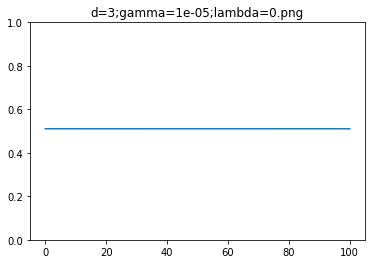

In [79]:
for lambda_ in lambda_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = best_w
    
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.show()

# Trying more complex models

iteration 0: loss: 0.5106825822576306, precision on train: {'accuracy': 0.7479348549504756, 'recall': 0.7629879027522217, 'precision': 0.7406886591669201, 'f1_score': 0.7516729341432841}
precision on test: {'accuracy': 0.744127319708715, 'recall': 0.7526458743092629, 'precision': 0.8240360951599672, 'f1_score': 0.7867247540261393}

iteration 100000: loss: 0.510660146088563, precision on train: {'accuracy': 0.7477782562737345, 'recall': 0.7603257252476217, 'precision': 0.7417124961808739, 'f1_score': 0.7509037833239894}
precision on test: {'accuracy': 0.7428353300446324, 'recall': 0.7492741406762199, 'precision': 0.8245722531436818, 'f1_score': 0.78512193925119}

iteration 200000: loss: 0.5106399889439569, precision on train: {'accuracy': 0.7478369807775125, 'recall': 0.758642289472654, 'precision': 0.7425943667369228, 'f1_score': 0.7505325535458384}
precision on test: {'accuracy': 0.742189335212591, 'recall': 0.7473072960569448, 'precision': 0.8250439458173922, 'f1_score': 0.7842539807

iteration 2500000: loss: 0.5104905285628856, precision on train: {'accuracy': 0.7472301609051404, 'recall': 0.7708961359276514, 'precision': 0.7360571172248804, 'f1_score': 0.7530739076393537}
precision on test: {'accuracy': 0.7459478505990134, 'recall': 0.7607005713215322, 'precision': 0.8209845345193572, 'f1_score': 0.7896937287311618}

iteration 2600000: loss: 0.5104137295215502, precision on train: {'accuracy': 0.747641232431586, 'recall': 0.7596601808714717, 'precision': 0.7418281913063425, 'f1_score': 0.7506382978723405}
precision on test: {'accuracy': 0.7433051444679352, 'recall': 0.7498360962817271, 'precision': 0.8248506078714197, 'f1_score': 0.7855565912770447}

iteration 2700000: loss: 0.5104308189982966, precision on train: {'accuracy': 0.746525466859805, 'recall': 0.7671377676858631, 'precision': 0.7367649270567003, 'f1_score': 0.7516446422064097}
precision on test: {'accuracy': 0.7454780361757105, 'recall': 0.7577971340264119, 'precision': 0.8223396686655148, 'f1_score': 

iteration 5000000: loss: 0.5102941953633494, precision on train: {'accuracy': 0.7472693105743257, 'recall': 0.7510472536507067, 'precision': 0.7454149829033261, 'f1_score': 0.7482205191208877}
precision on test: {'accuracy': 0.7403100775193798, 'recall': 0.7408448065936124, 'precision': 0.8269733403031887, 'f1_score': 0.7815433257583243}

iteration 5100000: loss: 0.5101961887099932, precision on train: {'accuracy': 0.7473867595818815, 'recall': 0.7575460987354656, 'precision': 0.7424602870079042, 'f1_score': 0.7499273326228079}
precision on test: {'accuracy': 0.7429527836504581, 'recall': 0.7482438887327901, 'precision': 0.8254804711717297, 'f1_score': 0.7849668386145909}

iteration 5200000: loss: 0.5102690725487131, precision on train: {'accuracy': 0.7467016403711388, 'recall': 0.7695258975061661, 'precision': 0.7359317084128946, 'f1_score': 0.7523539768812678}
precision on test: {'accuracy': 0.7454193093727978, 'recall': 0.7595766601105179, 'precision': 0.8210164000809881, 'f1_score'

iteration 7500000: loss: 0.5100552978091678, precision on train: {'accuracy': 0.7472301609051404, 'recall': 0.7537094311553068, 'precision': 0.7440674035711525, 'f1_score': 0.7488573817997939}
precision on test: {'accuracy': 0.7415433403805497, 'recall': 0.7443101994942399, 'precision': 0.8262632563942608, 'f1_score': 0.7831485587583148}

iteration 7600000: loss: 0.5099943484924682, precision on train: {'accuracy': 0.7478565556121051, 'recall': 0.7600516775633246, 'precision': 0.7419552090499121, 'f1_score': 0.7508944284360556}
precision on test: {'accuracy': 0.7438336856941508, 'recall': 0.7513346445630795, 'precision': 0.8245451742214, 'f1_score': 0.7862393413701853}

iteration 7700000: loss: 0.510122138821209, precision on train: {'accuracy': 0.7469169635516579, 'recall': 0.7737149121089927, 'precision': 0.7343564209274673, 'f1_score': 0.7535220665332191}
precision on test: {'accuracy': 0.7463589382194034, 'recall': 0.7632293715463145, 'precision': 0.8198189134808853, 'f1_score': 0.

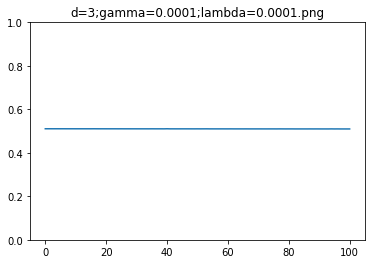

In [139]:
lambda_ = 0.0001
gamma = 0.0001
d_range = range(3,4)
max_iter = 10000000

for d in d_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = x_train.mean(axis=0)
    
    initial_w[:len(best_w)-1] = best_w[:-1]
    initial_w[-1] = best_w[-1]
    
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.ylim(0,1)
    plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
    plt.show()

# Reading previous data

In [143]:
mypath = './output2/'
filenames = next(walk(mypath), (None, None, []))[2]

i = len(frames)
frames2 = frames.copy()
for file in filenames:
    print(file)
    print(i)
    if '.csv' in file:
        curr_d = int(file[2])
        frames2[i] = pd.read_csv(mypath+file)
        frames2[i]['d'] = curr_d
        frames2[i]['Id'] = i
        i += 1
        
print(len(frames), len(frames2))
n = len(frames2)

d=4;gamma=0.0001;lambda=0.0001.csv
16
d=3;gamma=1e-05;lambda=0.0001.png
17
d=3;gamma=1e-05;lambda=0.csv
17
d=3;gamma=1e-05;lambda=0.0001.csv
18
d=7;gamma=0.0001;lambda=0.0001.csv
19
d=3;gamma=1e-05;lambda=5e-05.csv
20
d=3;gamma=1e-05;lambda=1e-05.csv
21
d=6;gamma=0.0001;lambda=0.0001.png
22
d=8;gamma=0.0001;lambda=0.0001.csv
22
d=3;gamma=0.0001;lambda=0.0001.csv
23
d=5;gamma=0.0001;lambda=0.0001.png
24
d=4;gamma=0.0001;lambda=0.0001.png
24
d=5;gamma=0.0001;lambda=0.0001.csv
24
d=9;gamma=0.0001;lambda=0.0001.csv
25
d=6;gamma=0.0001;lambda=0.0001.csv
26
d=3;gamma=1e-05;lambda=1e-05.png
27
d=3;gamma=1e-05;lambda=0.png
27
d=3;gamma=0.0001;lambda=0.0001.png
27
d=3;gamma=1e-05;lambda=5e-05.png
27
d=7;gamma=0.0001;lambda=0.0001.png
27
d=9;gamma=0.0001;lambda=0.0001.png
27
d=8;gamma=0.0001;lambda=0.0001.png
27
16 27


In [144]:
print(n)

27


In [145]:
for i in range(len(frames), len(frames2)):
    print(i)
    new_df = pd.concat([new_df,frames2[i]
                        [['Id','loss', 'gamma', 'lambda', 'acc_train', 'acc_test'
                          , 'iteration', 'd', ]].sort_values(['loss']).head(1)])
    
new_df

16
17
18
19
20
21
22
23
24
25
26


,Id,loss,gamma,lambda,acc_train,acc_test,iteration,d
5,0,0.618316,0.00100,0.10000,0.674471,0.668781,500000,3
99,1,0.589074,0.00001,0.01000,0.682986,0.675358,9900000,3
49,2,0.585554,0.01000,0.01000,0.686333,0.680879,4900000,3
84,3,0.538104,0.00100,0.00050,0.724054,0.720930,8400000,3
15,4,0.604871,0.00100,0.05000,0.675743,0.667136,1500000,3
40,5,0.585332,0.00500,0.01000,0.682300,0.676885,4000000,3
30,6,0.585780,0.00050,0.01000,0.684943,0.673538,3000000,3
30,7,0.582588,0.00100,0.01000,0.687409,0.675887,3000000,5
48,8,0.551948,0.00100,0.00100,0.712720,0.706307,4800000,3
53,9,0.577674,0.00100,0.00500,0.692029,0.683580,5300000,3


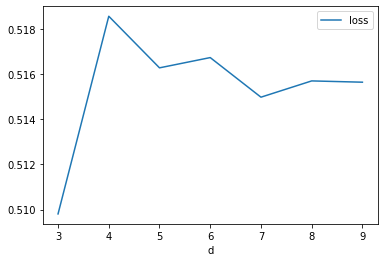

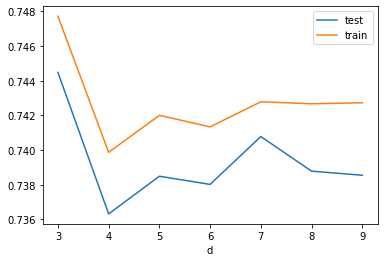

In [146]:
d_df2 = new_df[(new_df['lambda']==0.0001) & (new_df['gamma']==0.0001)]
d_df2 = d_df2.sort_values('d')
plt.plot(d_df2['d'], d_df2['loss'], label='loss')
plt.xlabel('d')
plt.legend()
plt.show()
plt.plot(d_df2['d'], d_df2['acc_test'], label='test')
plt.plot(d_df2['d'], d_df2['acc_train'], label='train')
plt.xlabel('d')
plt.legend()
plt.show()

# Comments on previous plots

Previous plots show us that loss for $d=3$ is less than loss for $d > 3$. This means that we trained model for $d=3$ more than other ones. Thus, we will run these again, with propriate initial parameters.

iteration 0: loss: 0.5045998788020126, precision on train: {'accuracy': 0.7504795834475199, 'recall': 0.7556669146145715, 'precision': 0.7479076255424675, 'f1_score': 0.7517672489338084}
precision on test: {'accuracy': 0.7458303969931876, 'recall': 0.7477755923948675, 'precision': 0.8300239110094605, 'f1_score': 0.7867560110366575}

iteration 100000: loss: 0.5044763567207053, precision on train: {'accuracy': 0.7501076615902595, 'recall': 0.7645930391888188, 'precision': 0.7430658600616368, 'f1_score': 0.7536757612009416}
precision on test: {'accuracy': 0.7489429175475687, 'recall': 0.7575161562236583, 'precision': 0.8275015346838551, 'f1_score': 0.7909637670529558}

iteration 200000: loss: 0.5047021525904308, precision on train: {'accuracy': 0.7503425596053713, 'recall': 0.7788435187722663, 'precision': 0.7368421052631579, 'f1_score': 0.7572608579802824}
precision on test: {'accuracy': 0.7522903453136012, 'recall': 0.7709094314882458, 'precision': 0.822853144056783, 'f1_score': 0.79603

iteration 2500000: loss: 0.5042648451163845, precision on train: {'accuracy': 0.7506557569588537, 'recall': 0.7618917120150335, 'precision': 0.7451468392234942, 'f1_score': 0.7534262485481997}
precision on test: {'accuracy': 0.7465938454310548, 'recall': 0.7525522150416784, 'precision': 0.8276679027606098, 'f1_score': 0.7883247485896493}

iteration 2600000: loss: 0.5045022730701089, precision on train: {'accuracy': 0.7498336139059625, 'recall': 0.7747328035078104, 'precision': 0.7379824724967369, 'f1_score': 0.7559112265556361}
precision on test: {'accuracy': 0.7506459948320413, 'recall': 0.7668820829821111, 'precision': 0.8233283056812468, 'f1_score': 0.7941033847347494}

iteration 2700000: loss: 0.5043173073103182, precision on train: {'accuracy': 0.7518106721998199, 'recall': 0.7550013702384215, 'precision': 0.7502139578308566, 'f1_score': 0.7526000507326973}
precision on test: {'accuracy': 0.7468874794456191, 'recall': 0.7471199775217757, 'precision': 0.8320642536768541, 'f1_score'

iteration 5000000: loss: 0.5047093647244807, precision on train: {'accuracy': 0.7493050933719609, 'recall': 0.7819363426379047, 'precision': 0.7340316060271959, 'f1_score': 0.7572270771330539}
precision on test: {'accuracy': 0.7510570824524313, 'recall': 0.7725952983047673, 'precision': 0.8199801192842943, 'f1_score': 0.795582774750446}

iteration 5100000: loss: 0.5042382743975212, precision on train: {'accuracy': 0.7490897701914419, 'recall': 0.7714442312962455, 'precision': 0.7384298294922241, 'f1_score': 0.7545760894539326}
precision on test: {'accuracy': 0.7515856236786469, 'recall': 0.7644469420249134, 'precision': 0.8263642806520198, 'f1_score': 0.7942006422107618}

iteration 5200000: loss: 0.5043447748936953, precision on train: {'accuracy': 0.7504991582821126, 'recall': 0.749637865560036, 'precision': 0.7509314090748657, 'f1_score': 0.7502840797774383}
precision on test: {'accuracy': 0.7448907681465822, 'recall': 0.7408448065936124, 'precision': 0.8337725308316644, 'f1_score': 

iteration 7500000: loss: 0.5041478633130707, precision on train: {'accuracy': 0.7506557569588537, 'recall': 0.7521434443878949, 'precision': 0.7499121745579452, 'f1_score': 0.7510261522223525}
precision on test: {'accuracy': 0.7441860465116279, 'recall': 0.7430926290156411, 'precision': 0.8310464020111029, 'f1_score': 0.7846123417721519}

iteration 7600000: loss: 0.5039203994329349, precision on train: {'accuracy': 0.7509493794777434, 'recall': 0.7651802842265983, 'precision': 0.7440045679482299, 'f1_score': 0.7544438654391754}
precision on test: {'accuracy': 0.7487080103359174, 'recall': 0.7567668820829822, 'precision': 0.827699241958615, 'f1_score': 0.7906453348989677}

iteration 7700000: loss: 0.504976350257288, precision on train: {'accuracy': 0.7485025251536624, 'recall': 0.7923501546411933, 'precision': 0.7284670481949393, 'f1_score': 0.759066871694858}
precision on test: {'accuracy': 0.7559901338971107, 'recall': 0.7859885735693547, 'precision': 0.8177743129994153, 'f1_score': 0

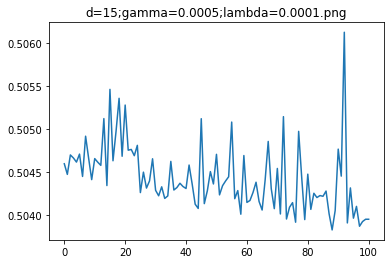

In [153]:
d = 15
max_iter = 10000000
gamma = 0.0005

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, d)
curr_data = add_constant_attribute(curr_data)

x_train, y_train, x_test, y_test = split_train_test(curr_data)
initial_w = x_train.mean(axis=0)
    
initial_w[:len(best_w)-1] = best_w[:-1]
initial_w[-1] = best_w[-1]

    
w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, w, max_iter, 
                                            gamma, frequency=max_iter/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={gamma};lambda={lambda_}.csv')
plt.plot(loss)
plt.title(f'd={d};gamma={gamma};lambda={lambda_}.png')
plt.savefig(f'd={d};gamma={gamma};lambda={lambda_}.png')
plt.show()

In [151]:
print(gamma)

0.0001


# Statistiacal tests

## Mutual information

In [154]:
from sklearn.feature_selection import mutual_info_classif



columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
    
mutual_info = mutual_info_classif(curr_data.drop(['Id', 'Prediction'], axis=1), curr_data['Prediction'])    

In [197]:
mutual_info.shape

(90,)

In [158]:
best_w.shape

(91,)

In [199]:
mutual_df = pd.DataFrame(np.array([mutual_info, best_w[:-1]]).T, columns =['mutual_info', 'weights'])

In [190]:
from sklearn.feature_selection import f_classif

columns = train_daa.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
    
anova_info = f_classif(curr_data.drop(['Id', 'Prediction'], axis=1), curr_data['Prediction'])    

In [202]:
mutual_df['f_stat'] = anova_info[0]
mutual_df['p_value_ANOVA'] = anova_info[1]

In [203]:
mutual_df

,mutual_info,weights,f_stat,p_value_ANOVA
0,0.207230,-2.319493,22.121901,2.563747e-06
1,0.031877,5.637793,4102.306146,0.000000e+00
2,0.094523,-0.983871,69.937360,6.235791e-17
3,0.010102,-5.945146,1268.907206,2.235458e-275
4,0.070241,1.952145,7879.027342,0.000000e+00
...,...,...,...,...
85,0.023698,-1.085184,504.647511,2.356874e-111
86,0.000000,-0.086814,3.816308,5.076004e-02
87,0.002180,0.059967,3.550586,5.952867e-02
88,0.005750,0.904328,273.057585,3.220615e-61


In [184]:
anova_df = anova_df.sort_values('p-value', ascending=False).head(20)

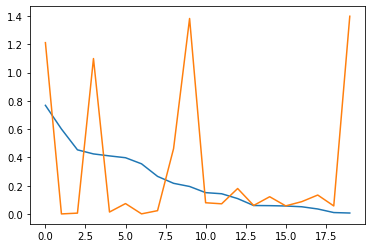

In [185]:
n = anova_df.shape[0]

plt.plot(range(n), anova_df['p-value'], label='p_value')
plt.plot(range(n), abs(anova_df['weights']), label='abs weights')
plt.show()

## Kendall

In [220]:
import scipy.stats as stats

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 3)
y = curr_data['Prediction'].values 
x = curr_data.drop(['Id', 'Prediction'], axis=1).values    
_, D = x.shape

i = 0

kendall = np.array([stats.kendalltau(x[:,i], y) for i in range(D)])
kendall.shape

(90, 2)

In [221]:
mutual_df['kendall-correlation'] = kendall[:,0]
mutual_df['kendall-p_value'] = kendall[:,1]